# Cassava Leaf Disease Identification - Metadata Preparation
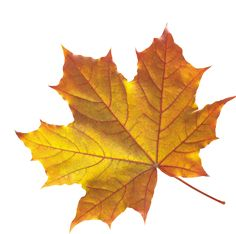

These **pre-EDA additional dataset** creation steps happen to take a lot of time. So, either you can manipulate and create your own, or you can use mine for your analysis. Although, this one didn't take long.


## The entire dataset obtained as a result of this notebook is available at :

## **https://www.kaggle.com/fireheart7/cassavaimagestatistics**

This notebook is the first one in my series of work, in this competition. As always, shout out to amazing notebook authors present here at kaggle!! I got loads of inspiration from them. I believe this is the best thing about the ML community. The extent of collaboration and guidance one can seek here is inexplicable!!

# 'Every image tells a story.'

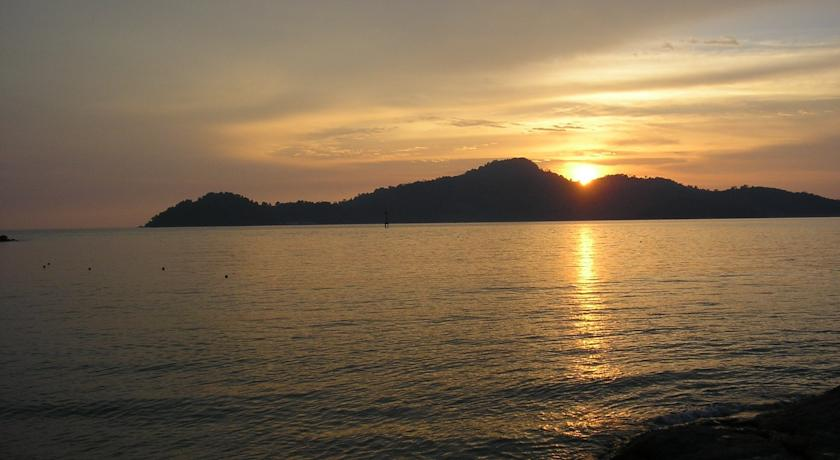

Hence, it is of paramount importance to understand the images in our dataset! By the end of this notebook :

* We will **create a new csv file** encapsulating information about our cassava images in training set.
* Features such as **Image mean, mean channel intensities, skewness**, ... are incorporated in the dataframe.
* These csv can then be used as independent additional datasets for the cassava disease competition.

# But What's The Need?

In the official dataset provided for this competiton, we are only given image_id and corresponding label associated with each image. **Features central to images** such as mean intensities, skewness, standard deviation are missing which heavily influences our analysis. 

So, in order to analyze them, *it's better to record all the features we need(from the image) in one dataframe and store it as .csv file*.

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm.notebook import tqdm
from scipy.stats import skew

In [ ]:
train = pd.DataFrame(pd.read_csv("../input/cassava-leaf-disease-classification/train.csv"))

print("Shape of train dataframe = ", train.shape)

In [ ]:
train.head()

Let's store all the names of the image present in a list. We will extract names one by one from this list when we prepare the metadata down the line.

In [ ]:
image_names = os.listdir("../input/cassava-leaf-disease-classification/train_images")

print("###TRAIN###")
print(len(image_names), type(image_names), image_names[0])

In [ ]:
TRAIN_DIRECTORY = "../input/cassava-leaf-disease-classification/train_images/"

In [ ]:
def prepare_metadata(base_directory, image_names) : 
    image_statistics = pd.DataFrame(index = np.arange(len(image_names)), 
                                    columns = ["image_name", "path", "rows", "columns", "image_mean", "image_sd",
                                               "image_skewness", "mean_red_value", "mean_green_value", "mean_blue_value"])
    i = 0 
    for name in tqdm(image_names) : 
        path = os.path.join(base_directory, name)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_statistics.iloc[i]["image_name"] = name
        image_statistics.iloc[i]["path"] = path
        image_statistics.iloc[i]["rows"] = image.shape[0]
        image_statistics.iloc[i]["columns"] = image.shape[1]
        image_statistics.iloc[i]["image_mean"] = np.mean(image.flatten())
        image_statistics.iloc[i]["image_sd"] = np.std(image.flatten())
        image_statistics.iloc[i]["image_skewness"] = skew(image.flatten())
        image_statistics.iloc[i]["mean_red_value"] = np.mean(image[:, :, 0])
        image_statistics.iloc[i]["mean_green_value"] = np.mean(image[:, :, 1])
        image_statistics.iloc[i]["mean_blue_value"] = np.mean(image[:, :, 2])
        
        i = i + 1
        del image
    return image_statistics

Use the above function to create train and test image statistics file. Rest is pretty much intuitive :-)

In [ ]:
train_image_statistics = prepare_metadata(TRAIN_DIRECTORY, image_names)

In [ ]:
print("Shape of created metadata file = ", train_image_statistics.shape)

train_image_statistics.head()

**Export it for using it in other notebooks.**

In [ ]:
train_image_statistics.to_csv("train_image_statistics.csv", index = False)

**Thank you & all the best!**